In [26]:
import matplotlib.pyplot as plt

# http://www.ecircuitcenter.com/Circuits.htm
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

from pathlib import Path
from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import SubCircuitFactory
from PySpice.Spice.Parser import SpiceParser
from PySpice.Unit import *
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline
from PySpice.Spice.Netlist import Circuit
import numpy as np

libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)


In [13]:
# Initialize the Circuit
circuit = Circuit('Name me please')

# Include non-passive elements: 
# D1N4148 is a (regular&cheap) Diode 
circuit.include(spice_library['D1N4148']) 

# Set the element values
V = 2
w = 1E3
R = 1
C = 30
fc = 1/2/3.14/(R*1000)/(C*1E-9) # Cut Frequency!
# Connect 'em
circuit.V('1', 1,circuit.gnd,f'DC 0 AC {V} SIN(0 {V} {w})')
circuit.R('1',  1, 2, R@u_kΩ)
circuit.C('1',  2, circuit.gnd, C@u_nF)
# Diodo?
#circuit.X('diodus','D1N4148', 1, 2)

print(str(circuit))
print('\nLa frecuencia de corte es ',round(fc,-3),'!')

.title Name me please
.include /home/m4zz31/anaconda3/lib/python3.7/libraries/D1N4148.lib
V1 1 0 DC 0 AC 2 SIN(0 2 1000.0)
R1 1 2 1kOhm
C1 2 0 30nF


La frecuencia de corte es  5000.0 !


In [14]:
%%html
<img src="./schematic_RClow.png" width=550 style="text-align:center"/>

In [15]:
f = w
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=((1/f)/10)@u_s, end_time=(4/f)@u_s)

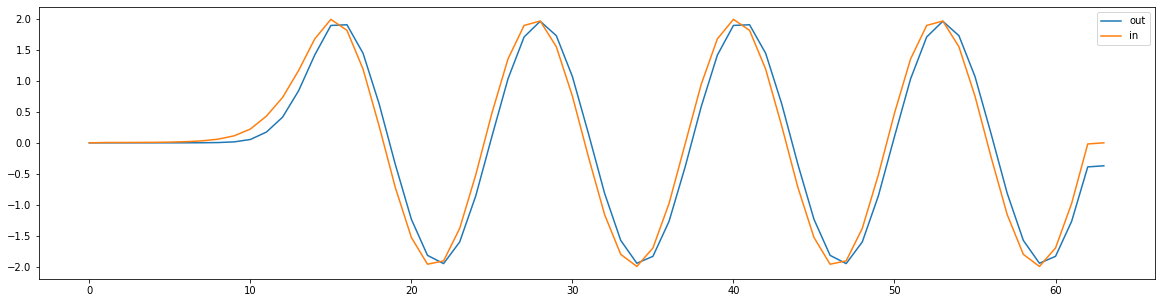

In [16]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(analysis['2'],label='out')
ax.plot(analysis['1'],label='in')
ax.legend()

In [20]:
# y aca todo junto:
import random
import itertools
import matplotlib.pyplot as plt
def doit(w,V,R,C):
    circuit = Circuit('Name me please')
    # Include non-passive elements: 
    # D1N4148 is a (regular&cheap) Diode 
    circuit.include(spice_library['D1N4148']) 
    # Set the element values
    #V = 2
    #w = 1E3
    #R = 1
    #C = 30
    fc = 1/2/3.14/(R*1000)/(C*1E-9) # Cut Frequency!
    # Connect 'em
    circuit.V('1', 1,circuit.gnd,f'DC 0 AC {V} SIN(0 {V} {w})')
    circuit.R('1',  1, 2, R@u_kΩ)
    circuit.C('1',  2, circuit.gnd, C@u_nF)
    # Diodo?
    #circuit.X('diodus','D1N4148', 1, 2)
    f = w
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.transient(step_time=((1/f)/10)@u_s, end_time=(4/f)@u_s)    # Printer?
    if True:
        outputter = max(analysis['2'])
        del(circuit)
        return outputter
    return

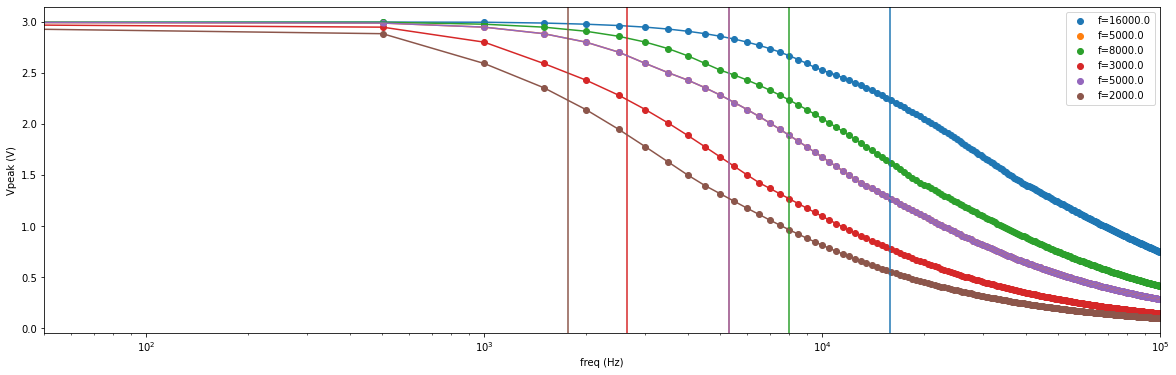

In [34]:
from math import sqrt 
fig, ax = plt.subplots(figsize=(20,6))
list1 = [1,2,3]
list2 =  [3]
for (R,V) in list(itertools.product(list1, list2)):
    for C in [10,30]:
        f_zero = 1/2/3.14/(R*1000)/(C*1E-9) # Cut Frequency!
        try: 
            x = [i for i in range(1,100000,500)]
        except: break
        y = []
        for j in x:
            y.append(float(doit(j,V,R,C)))
        #ax.axvspan(f_zero-alpha/2,f_zero+alpha/2,alpha=0.2)
        ax.scatter(x,y,label=f'f={round(f_zero,-3)}')
        ax.plot(x,y)
        col = plt.gca().lines[-1].get_color()
        ax.axvline(linewidth=1.5,color=col, x=f_zero)
ax.set_xlabel('freq (Hz)')
ax.set_ylabel('Vpeak (V)')
ax.legend()
ax.set_xscale('log')
ax.set_xlim([50,100000])
plt.show()

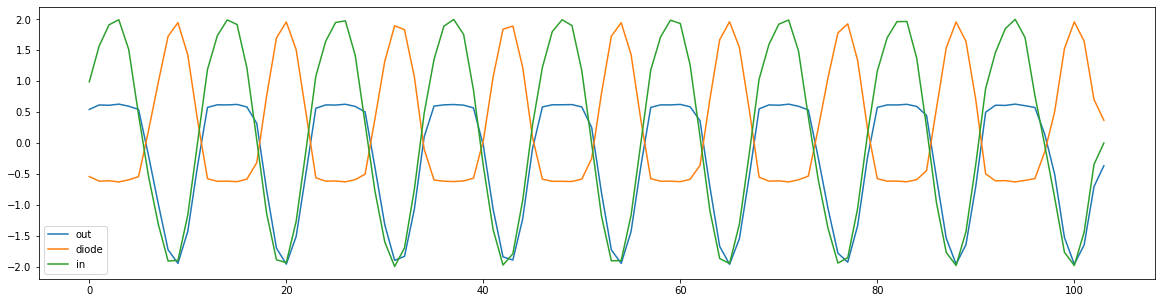

In [36]:
# TESTING WHERE TO PUT THE DIODE!

try: del(circuit)
except: pass
#---------------------------------------
# Initialize the Circuit
circuit = Circuit('Name me please')

# Include non-passive elements: 
# D1N4148 is a (regular&cheap) Diode 
circuit.include(spice_library['D1N4148']) 

# Set the element values
V = 2
w = 1E3
R = 1
C = 30
fc = 1/2/3.14/(R*1000)/(C*1E-9) # Cut Frequency!
# Connect 'em
circuit.V('1', 1,circuit.gnd,f'DC 0 AC {V} SIN(0 {V} {w})')
circuit.R('1',  1, 2, R@u_kΩ)
circuit.C('1',  2, circuit.gnd, C@u_nF)
# Diodo?
circuit.X('diodus','D1N4148', 2, circuit.gnd)
#circuit.R('ex',4,2,0.0001@u_kΩ)
#----------------------------------------
f = w
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=((1/f)/10)@u_s, end_time=(2+9/f)@u_s,start_time=2@u_s)
#analysis = simulator.transient(step_time=((1/f)/10)@u_s, end_time=(9/f)@u_s)

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(analysis['2'],label='out')
#ax.plot((analysis['2']-analysis['4'])/0.0001,label='current')
ax.plot(-analysis['2'],label='diode')
ax.plot(analysis['1'],label='in')
ax.legend()

In [62]:
%%html
<img src="./schematic_dioded.png" width=550 style="text-align:center"/>

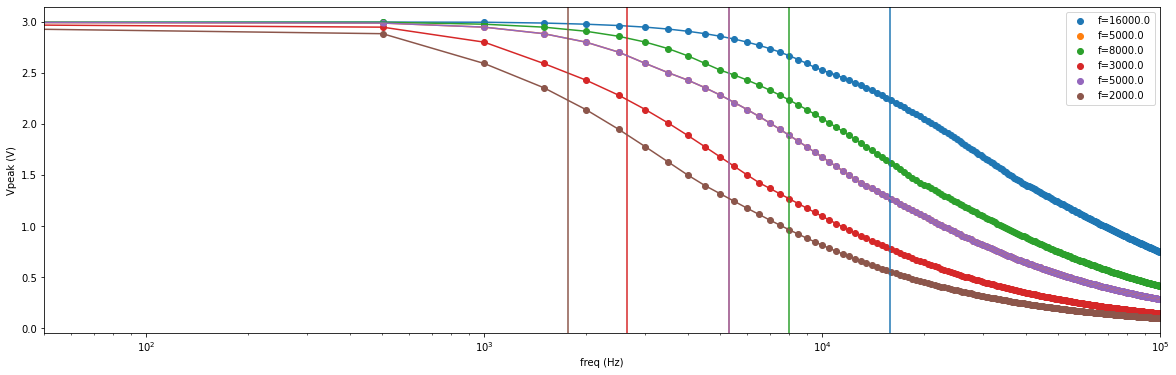

In [63]:
# y aca todo junto:
import random
import itertools
import matplotlib.pyplot as plt
def doit2(w,V,R,C):
    circuit = Circuit('Name me please')
    # Include non-passive elements: 
    # D1N4148 is a (regular&cheap) Diode 
    circuit.include(spice_library['D1N4148']) 
    # Set the element values
    #V = 2
    #w = 1E3
    #R = 1
    #C = 30
    fc = 1/2/3.14/(R*1000)/(C*1E-9) # Cut Frequency!
    # Connect 'em
    circuit.V('1', 1,circuit.gnd,f'DC 0 AC {V} SIN(0 {V} {w})')
    circuit.R('1',  1, 2, R@u_kΩ)
    circuit.C('1',  2, circuit.gnd, C@u_nF)
    # Diodo?
    #circuit.X('diodus','D1N4148', 1, 2)
    circuit.X('diodus','D1N4148', 2, circuit.gnd)
    f = w
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.transient(step_time=((1/f)/10)@u_s, end_time=(4/f)@u_s)    # Printer?
    if True:
        outputter = max(analysis['2'])
        del(circuit)
        return outputter
    return

from math import sqrt 
fig, ax = plt.subplots(figsize=(20,6))
list1 = [1,2,3]
list2 =  [3]
for (R,V) in list(itertools.product(list1, list2)):
    for C in [10,30]:
        f_zero = 1/2/3.14/(R*1000)/(C*1E-9) # Cut Frequency!
        try: 
            x = [i for i in range(1,100000,500)]
        except: break
        y = []
        for j in x:
            y.append(float(doit(j,V,R,C)))
        #ax.axvspan(f_zero-alpha/2,f_zero+alpha/2,alpha=0.2)
        ax.scatter(x,y,label=f'f={round(f_zero,-3)}')
        ax.plot(x,y)
        col = plt.gca().lines[-1].get_color()
        ax.axvline(linewidth=1.5,color=col, x=f_zero)
ax.set_xlabel('freq (Hz)')
ax.set_ylabel('Vpeak (V)')
ax.legend()
ax.set_xscale('log')
ax.set_xlim([50,100000])
plt.show()

In [61]:
import random
import matplotlib.pyplot as plt

def doit_f(w,V,R,C):
    circuit = Circuit('Name me please')
    # Include non-passive elements: 
    # D1N4148 is a (regular&cheap) Diode 
    circuit.include(spice_library['D1N4148']) 
    # Set the element values
    #V = 2
    #w = 1E3
    #R = 1
    #C = 30
    fc = 1/2/3.14/(R*1000)/(C*1E-9) # Cut Frequency!
    # Connect 'em
    circuit.V('1', 1,circuit.gnd,f'DC 0 AC {V} SIN(0 {V} {w})')
    circuit.R('1',  1, 2, R@u_kΩ)
    circuit.C('1',  2, circuit.gnd, C@u_nF)
    # Diodo?
    #circuit.X('diodus','D1N4148', 1, 2)
    circuit.X('diodus','D1N4148', 2, circuit.gnd)
    f = w
    treshold = 4
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.transient(step_time=((1/f)/10)@u_s, end_time=(4/f)@u_s)    # Printer?
    if True:
        outputter = int(float(max(-analysis['2']))>treshold)
        #outputter = round(float(max(-analysis['2'])),2)
        del(circuit)
        return [w,V,R,C,outputter] 
    return
    
W_vector = [int(x*100) for x in range(1,3000)]
V_vector = [x/50 for x in range(1,2000,4)]
R_vector = [x/400 for x in range(1,20000,5)]
C_vector = [int(x/40) for x in range(1,4000,2)]
answ = []
veces = 6000
#fig, axy = plt.subplots(veces,1,figsize=(20,int(4*veces)))
counter = 0
errorlog = []
while counter <veces:
    try: 
        answ += [doit_f(random.choice(W_vector),
     random.choice(V_vector),
     random.choice(R_vector),
     random.choice(C_vector),
        #,axy[counter],
                   )]
    except Exception as ins:
        errorlog.append(ins.args)
    counter += 1
import pandas as pd

data = pd.DataFrame(answ,columns=['W','V','R','C','D'])

#fig.savefig('algo.png')

if True:
    data.to_excel("FULL.xlsx")
    data[:1700].to_excel("TRAIN.xlsx",index=False)
    data[1700:].to_excel("TEST_cresults.xlsx",index=False)
    data[1700:].drop('D', axis=1).to_excel("TEST.xlsx",index=False)

In [60]:
sum(data['D'])

16